In [1]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Machine learning/'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Machine learning/'

In [3]:
# Warning
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [4]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [6]:
# Tensorflow
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [7]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [8]:
# Data Preprocessing
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Machine learning


In [9]:
#Loading the data
#Creating the directory for the data

import os

# Make directory
directory = os.path.dirname(abspath_curr + '/data/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [10]:
# Downloading the data to the directory

import tensorflow_datasets as tfds

# Get the name of the data
data_name = 'fashion_mnist'

# Load data
data, info = tfds.load(name=data_name,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True,
                       with_info=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /content/drive/My Drive/Machine learning/data/fashion_mnist/3.0.1.incompleteXV4UVM/fashion_mnist-tra…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /content/drive/My Drive/Machine learning/data/fashion_mnist/3.0.1.incompleteXV4UVM/fashion_mnist-tes…

Dataset fashion_mnist downloaded and prepared to /content/drive/My Drive/Machine learning//data/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [11]:
# Getting the name of the target

target = 'label'

In [12]:
# Getting the info

# Print the splits

info.splits

{Split('train'): <SplitInfo num_examples=60000, num_shards=1>,
 Split('test'): <SplitInfo num_examples=10000, num_shards=1>}

In [13]:
# Get the classes
classes = info.features['label'].names

# Print the classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [14]:
# Get the number of classes
n_classes = info.features['label'].num_classes

# Print the number of classes
info.features['label'].num_classes

10

In [15]:
# Set the training, validation and test split
split_train, split_valid, split_test = 'train[:70%]', 'train[70%:]', 'test'

# Get the training data
data_train = tfds.load(name=data_name,
                       split=split_train,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True)

# Get the validation data
data_valid = tfds.load(name=data_name,
                       split=split_valid,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True)

# Get the test data
data_test = tfds.load(name=data_name,
                      split=split_test,
                      data_dir=abspath_curr + '/data/',
                      as_supervised=True)

In [16]:
# Normalizing the data

# Call preprocess
# See the implementation in pmlm_utilities_deep.ipynb

# Normalize the training data
data_train = data_train.map(normalize)

# Normalize the validation data
data_valid = data_valid.map(normalize)

# Normalize the test data
data_test = data_test.map(normalize)


In [17]:
# Shuffling, batching and prefetching the data

# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=42)

# Set the batch size
batch_size = 16

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(1)


In [18]:
# Building the model

# A sequential dnn
model = keras.models.Sequential()

# Add the input layer
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Add two hidden layers
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))

# Add the output layer
model.add(keras.layers.Dense(10, activation='softmax'))

In [19]:
# A sequential dnn with two hidden layers
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
                                 keras.layers.Dense(50, activation='relu'),
                                 keras.layers.Dense(50, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                39250     
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Training the model

# Train and evaluate the model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid)

Epoch 1/10
2625/2625 [==============================] - 11s 4ms/step - loss: 0.7609 - accuracy: 0.7428 - val_loss: 0.5260 - val_accuracy: 0.8141
Epoch 2/10
2625/2625 [==============================] - 5s 2ms/step - loss: 0.4967 - accuracy: 0.8260 - val_loss: 0.4717 - val_accuracy: 0.8377
Epoch 3/10
2625/2625 [==============================] - 6s 2ms/step - loss: 0.4478 - accuracy: 0.8444 - val_loss: 0.4338 - val_accuracy: 0.8469
Epoch 4/10
2625/2625 [==============================] - 5s 2ms/step - loss: 0.4189 - accuracy: 0.8537 - val_loss: 0.4157 - val_accuracy: 0.8516
Epoch 5/10
2625/2625 [==============================] - 6s 2ms/step - loss: 0.3955 - accuracy: 0.8596 - val_loss: 0.3934 - val_accuracy: 0.8577
Epoch 6/10
2625/2625 [==============================] - 6s 2ms/step - loss: 0.3779 - accuracy: 0.8662 - val_loss: 0.3800 - val_accuracy: 0.8634
Epoch 7/10
2625/2625 [==============================] - 5s 2ms/step - loss: 0.3641 - accuracy: 0.8703 - val_loss: 0.3732 - val_accuracy

In [23]:
# Plotting the learning curve

# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

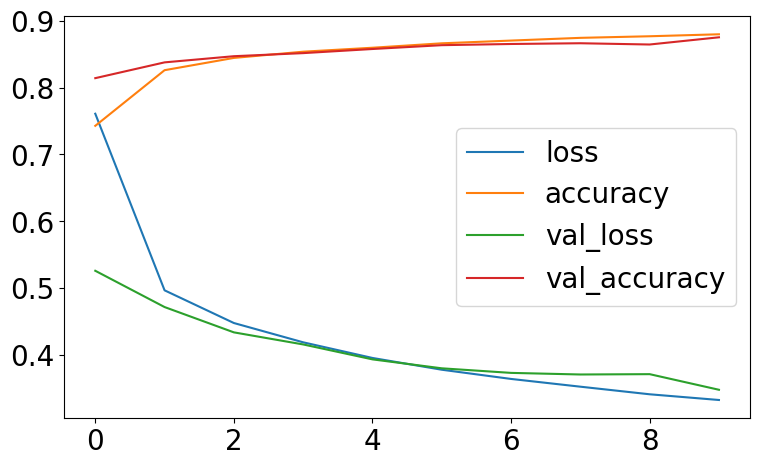

In [24]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_without_callback_10.pdf')
plt.show()